# Model for Outbreaks of the Spruce Budworm

This set of activities has the following goals:

- Demonstrate how to use Python to study parameter changes in a differential equation.
- Explore a biological model that exhibits a bifurcation.
- Introduce the notion of bifurcation diagram.
- Show how to plot a bifurcation diagram numerically.

As usual, we start by importing the necessary Python modules:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import detools

## Model Description and Simulation

In this model, we represent the interaction of three species:

- An insect population, the _spruce budworm_. This is an insect that lives on forests of eastern Canada, and feeds on the tree leaves while in the larva development stage.
- The balsam fir tree, which is inhabited by the spruce budworms larvae.
- Birds that feed on the larvae.

The model is of interest due to the occurrence of outbreaks, that could devastate whole forests due to excessive numbers in the budworm population.

Under appropriate assumptions, the model can be described by the single differential equation:

$$
x'=rx\left(1-\frac{x}{k}\right)-\frac{x^2}{1+x^2}
$$

The assumptions for the model are the following:

- In the absence of predators, the growth of the budworm population $x(t)$ is logistic, represented by the term $rx\left(1-{x}/{k}\right)$. The carrying capacity $k$ is determined by the availability of trees. We assume that the insect reproduces much faster than the trees grow, so that $k$ can be assumed to be a constant.
- We assume that birds have a variety of food sources, so that the presence or absence of the budworm does not affect the bird population. The predation of the budworm larvae by birds is represented by the term $x^2/(1+x^2)$. This represents a predation rate that satisfies the following assumptions:
    - If the budworm population is small, the predation rate grows approximately linearly.
    - As the budworm population grows, there is a saturation effect, due to limits on the bird population. This is represented by a horizontal assymptote in the function.
    
**Notice**: In the differential equations above, the time and population variables have been properly scaled to reduce the number of parameters to two. This is a process called _nondimensionalization_, which is beyond the scope of this course.

To solve the model numerically, we start by setting up the function that defines the right-hand side of the differential equation:

In [2]:
def outbreak_model(t, x, r, k):
    return r * x * (1 - x / k) - x**2 / (1 + x**2)

We want to know how the population evolves for different initial conditions. The next cell shows how this can be done.

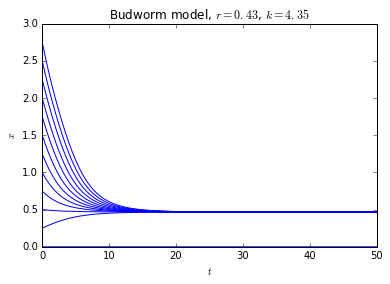

In [3]:
r, k = 0.43, 4.35
t0, x0 = 0, 0.3
inits = np.arange(0.0, 3.0, 0.25)
tmin, tmax = 0, 50
tstep = 0.01
for x0 in inits:
    tvalues, xvalues = detools.solve_de(outbreak_model, t0, x0, tmin, tmax, tstep, args=(r,k))
    plt.plot(tvalues, xvalues, color='blue')
plt.title('Budworm model, $r={:5.2f}$, $k={:5.2f}$'.format(r, k))
plt.xlabel('$t$')
plt.ylabel('$x$')
None

We see that all solutions starting with a positive initial value converge to a single equilibrium value. Now let's investigate what happens for a different set of parameter values.

Let's now keep the value of $r$ the same and plot the solutions for a different value of $k$:

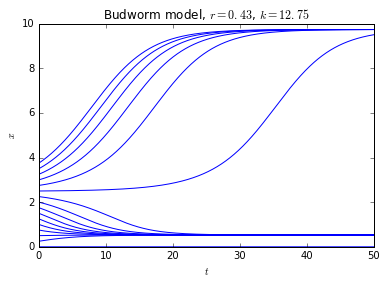

In [4]:
r, k = 0.43, 12.75
t0, x0 = 0, 0.3
inits = np.arange(0.0, 4.0, 0.25)
tmin, tmax = 0, 50
tstep = 0.01
for x0 in inits:
    tvalues, xvalues = detools.solve_de(outbreak_model, t0, x0, tmin, tmax, tstep, args=(r,k))
    plt.plot(tvalues, xvalues, color='blue')
plt.title('Budworm model, $r={:5.2f}$, $k={:5.2f}$'.format(r, k))
plt.xlabel('$t$')
plt.ylabel('$x$')
None

### Exercise 1

Describe the behavior of the solutions displayed abbove as $t\to\infty$, for each of the previous two plots:

- $r=0.43, k=4.35$ and
- $r=0.43, k=12.75$.

How many equilibrium points can be identified in each of the graph? What are approximate their values?

(_Note_: You may wish to redraw the graphs with different initial conditions or maximum time to get a better idea of the behavior as $t\to\infty$.

#### Solution:
(Double click on this cell to enter your answer.)

### Exercise 2

In the last example above, with $r=0.43$ and $k=12.75$, there seems to be a specific value of the initial condition, $x_0^*$, that separates two kinds of assymptotic behavior as $t\to\infty$. Use the computer to determine the value of $x_0^*$ to a precision of approximately 2 decimals. To solve this problem, you may have to produce several plots, with initial conditions that get close to each other. Each plot should have at least one solution that approaches the equilibrium at the top, and at least one that approaches the equilibrium at the bottom.

Write your code in the computation cell below, and add more cells if necessary. Then, state your conclusions in a markdown cell.

**Hint**: It may be easier to understand what is happening if you control the set of initial conditions more carefully. Try specifying a smaller set of initial conditions by using an explicit list, as in:

    inits = [1,3,5]


In [5]:
# Enter your code here

#### Conclusions for Exercise 2:
(Double click on this cell to enter your conclusions.)

### Exercise 3

The situation illustrated in the second example above, with $r=0.43$ and $k=12.75$, is referred as _bistability_, since there are two possible stable equilibrium values for the system. The largest equilibrium is called the _outbreak_ value, and the smallest is the _refuge_ value. Suppose that the value of parameter $r$ is $0.25$. Using a series of computations, find two values $k_1$ and $k_2$ for the parameter $k$ so that:

- If $k=k_1$, then the equation has a single stable equilibrium.
- If $k=k_2$, then the equations has two stable equilibria.

In the second case, also determine the value of the initial condition $x_0^*$ that separates solutions that converge to different equilibria.

Your solution will require several plots, with at least two different values of $k$, and several initial conditions for each plot. You will have to try different values of $k$ in a systematic way. When stating the conclusions, explain how you selected the different values of $k$ to solve the problem.

Write your code in the cell below, adding more cells if necessary. Then, write your conclusions in a markdown cell.

In [6]:
# Enter your code here. Use more cells if necessary.

#### Conclusions for Exercise 3:

(Double click on this cell to enter your conclusions.)

## Constructing a Bifurcation Diagram

The exercises below show that there are two kinds of possible behavior of this system:

1. The system has two equilibrium points if $k$ is large enough.
2. The system has a single equilibrium point if $k$ is not too large.

It is important to find the value of $k^*$ that separates the two possibilities: if $k>k^*$, then we are in case 1, and if $k<k^*$ then we are in case 2. We say that a _bifurcation_ occurs at $k=k^*$.

To find the value of $k^*$ computationally, we can make a _bifurcation diagram_. In this kind of plot we generate solutions for different values of $k$ and several initial conditions. For each initial condition, we solve the problem for a large enough time, and assume that the final value is near the equilibrium point. We then plot the value we obtained. The following code illustrates how this can be done.

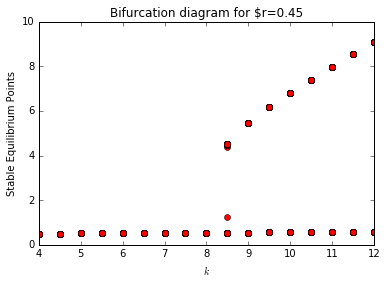

In [7]:
r = 0.45
k_min, k_max, nks = 4, 12, 17
init_min, init_max, ninits = 0.01, 10, 100
init_min, init_max, ninits = 0.01, 10, 100
tmax = 100
kvalues = np.linspace(k_min, k_max, nks)
inits = np.linspace(init_min, init_max, ninits)
tvalues = np.array([0, tmax])
for k in kvalues:
    for x0 in inits:
        tvalues, xvalues = detools.solve_de(outbreak_model, t0, x0, 0, tmax, tstep, args=(r,k))
        plt.plot(k, xvalues[-1], 'o', color='red')
plt.xlabel('$k$')
plt.ylabel('Stable Equilibrium Points')
plt.title('Bifurcation diagram for $r={:4.2f}'.format(r))
None

From this picture, we can see that the bifurcation value is around $8.5$.

In the next exercise, you will be asked to modify this code to find bifurcation values for different parameter sets. You can do that with code similar with the one above, modifying the following lines:

- `r = 0.45`: the value of the parameter $r$
- `k_min, k_max, nks = 4, 12, 17`: the smallest, largest and number of values of the parameter $k$ that are plotted.
- `init_min, init_max, ninits = 0.01, 10, 100`: the smallest, largest and number of initial conditions $x_0$ to be plotted for each value of $k$
- `tmax = 100`: The maximum value of $t$ (time) for which $x(t)$ is computed. We use this as an approximation for the equilibrium points.

### Exercise 4
Refine the analysis done in the previous graph, by plotting the bifurcation diagram for values of $k$ between $8$ and $9$, and use the plot to get a better approximation for the bifurcation value $k^*$.

Use the cell bellow for the computations, adding more cells if necessary. Then, state your conclusions in a markdown cell.

In [8]:
# Enter your code here. Use more cells if necessary.

#### Conclusions for Exercise 4
(Double click this cell to enter your conclusion).

### Exercise 5

Repeat the analysis of Exercise 4 for the parameter value $r=0.30$. Your solution must contain the following:

- A bifurcation diagram, showing a rough approximation to value $k^*$ at which a bifurcation occurs.
- A more precise bifurcation diagram, zooming in the value of $k^*$.
- A plot of solution curves for a value of $k<k^*$, with several initial conditions plotted.
- A plot of solution curves for a value of $k<k^*$, with several initial conditions plotted.
- The conclusions from your experiments.

In [9]:
# Enter your code here. Use more cells if necessary.

#### Conclusions for Exercise 5
(Double click this cell to enter your conclusion).

### Exercise 6

Suppose that you work for the Forest Management Bureau. Based on the analysis from the previous examples, what would be your recommendation, given that the goal is to avoid budworm outbreaks. In stating your conclusions, keep in mind the following:

- The parameter $r$ represents the intrinsic growth rate of the budworm population, and is something that may be hard to control.
- The parameter $k$ is a limit on the growth of the budworm population, and is mostly determined by the density of trees.

State your prescription using terminology that could be easily understood by a public that may not have a high level of mathematical sophistication. In particular, your explanation should avoid formulas or particular numerical values. It is, however, important to justify your recomentations in terms that can be understood by a layperson.

#### Conclusions for Exercise 5
(Double click this cell to enter your conclusion).